Requires script 3.

In [1]:
suppressPackageStartupMessages({
  library(cowplot)
  library(dataorganizer)
  library(ggplot2)
  library(Seurat)

  devtools::load_all()
})

suppressMessages({
  load_arial_font()
})

ℹ Loading cellAdmixNotebooks


In [2]:
# load data
cell_annot <- prepare_nsclc_metadata(reps='one')
df <- prepare_nsclc_transcript_data(cell_annot,reps='one')
sc_obj <- prepare_nsclc_scrna()

# reordering cell types to look nicer on the dotplots
sc_obj@meta.data$cell_type <- factor(sc_obj@meta.data$cell_type,
                                     levels=c('macrophage','monocyte','DC','mast',
                                              'Treg','CD4+ T cells','CD8+ T cells',
                                              'NK','B cells','plasmablast','neutrophil',
                                              'fibroblast','endothelial','epithelial','malignant'))
Idents(sc_obj) <- sc_obj@meta.data$cell_type

sp_ct <- unique(cell_annot$celltype)
sc_ct <- unique(sc_obj$cell_type)
ct_keep <- sc_ct[sc_ct %in% sp_ct]
cells_keep <- rownames(sc_obj@meta.data)[sc_obj@meta.data$cell_type %in% ct_keep]
sc_obj <- subset(sc_obj,cells=cells_keep)

ct_exp <- prep_sc_for_plt(sc_obj)

Using cell_type column for cell type labels.

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 16.8 GiB”


In [3]:
## load the NMF result to plot
base_dir <- CachePath('nsclc_scaled_dat11/')
k_joint <- c(15)
k_ct <- c()

nmf_crf <- load_nmf_crf_multi(k_joint, k_ct, dir=base_dir)
all_nmf <- nmf_crf[[1]]
res <- all_nmf[['joint_15']]

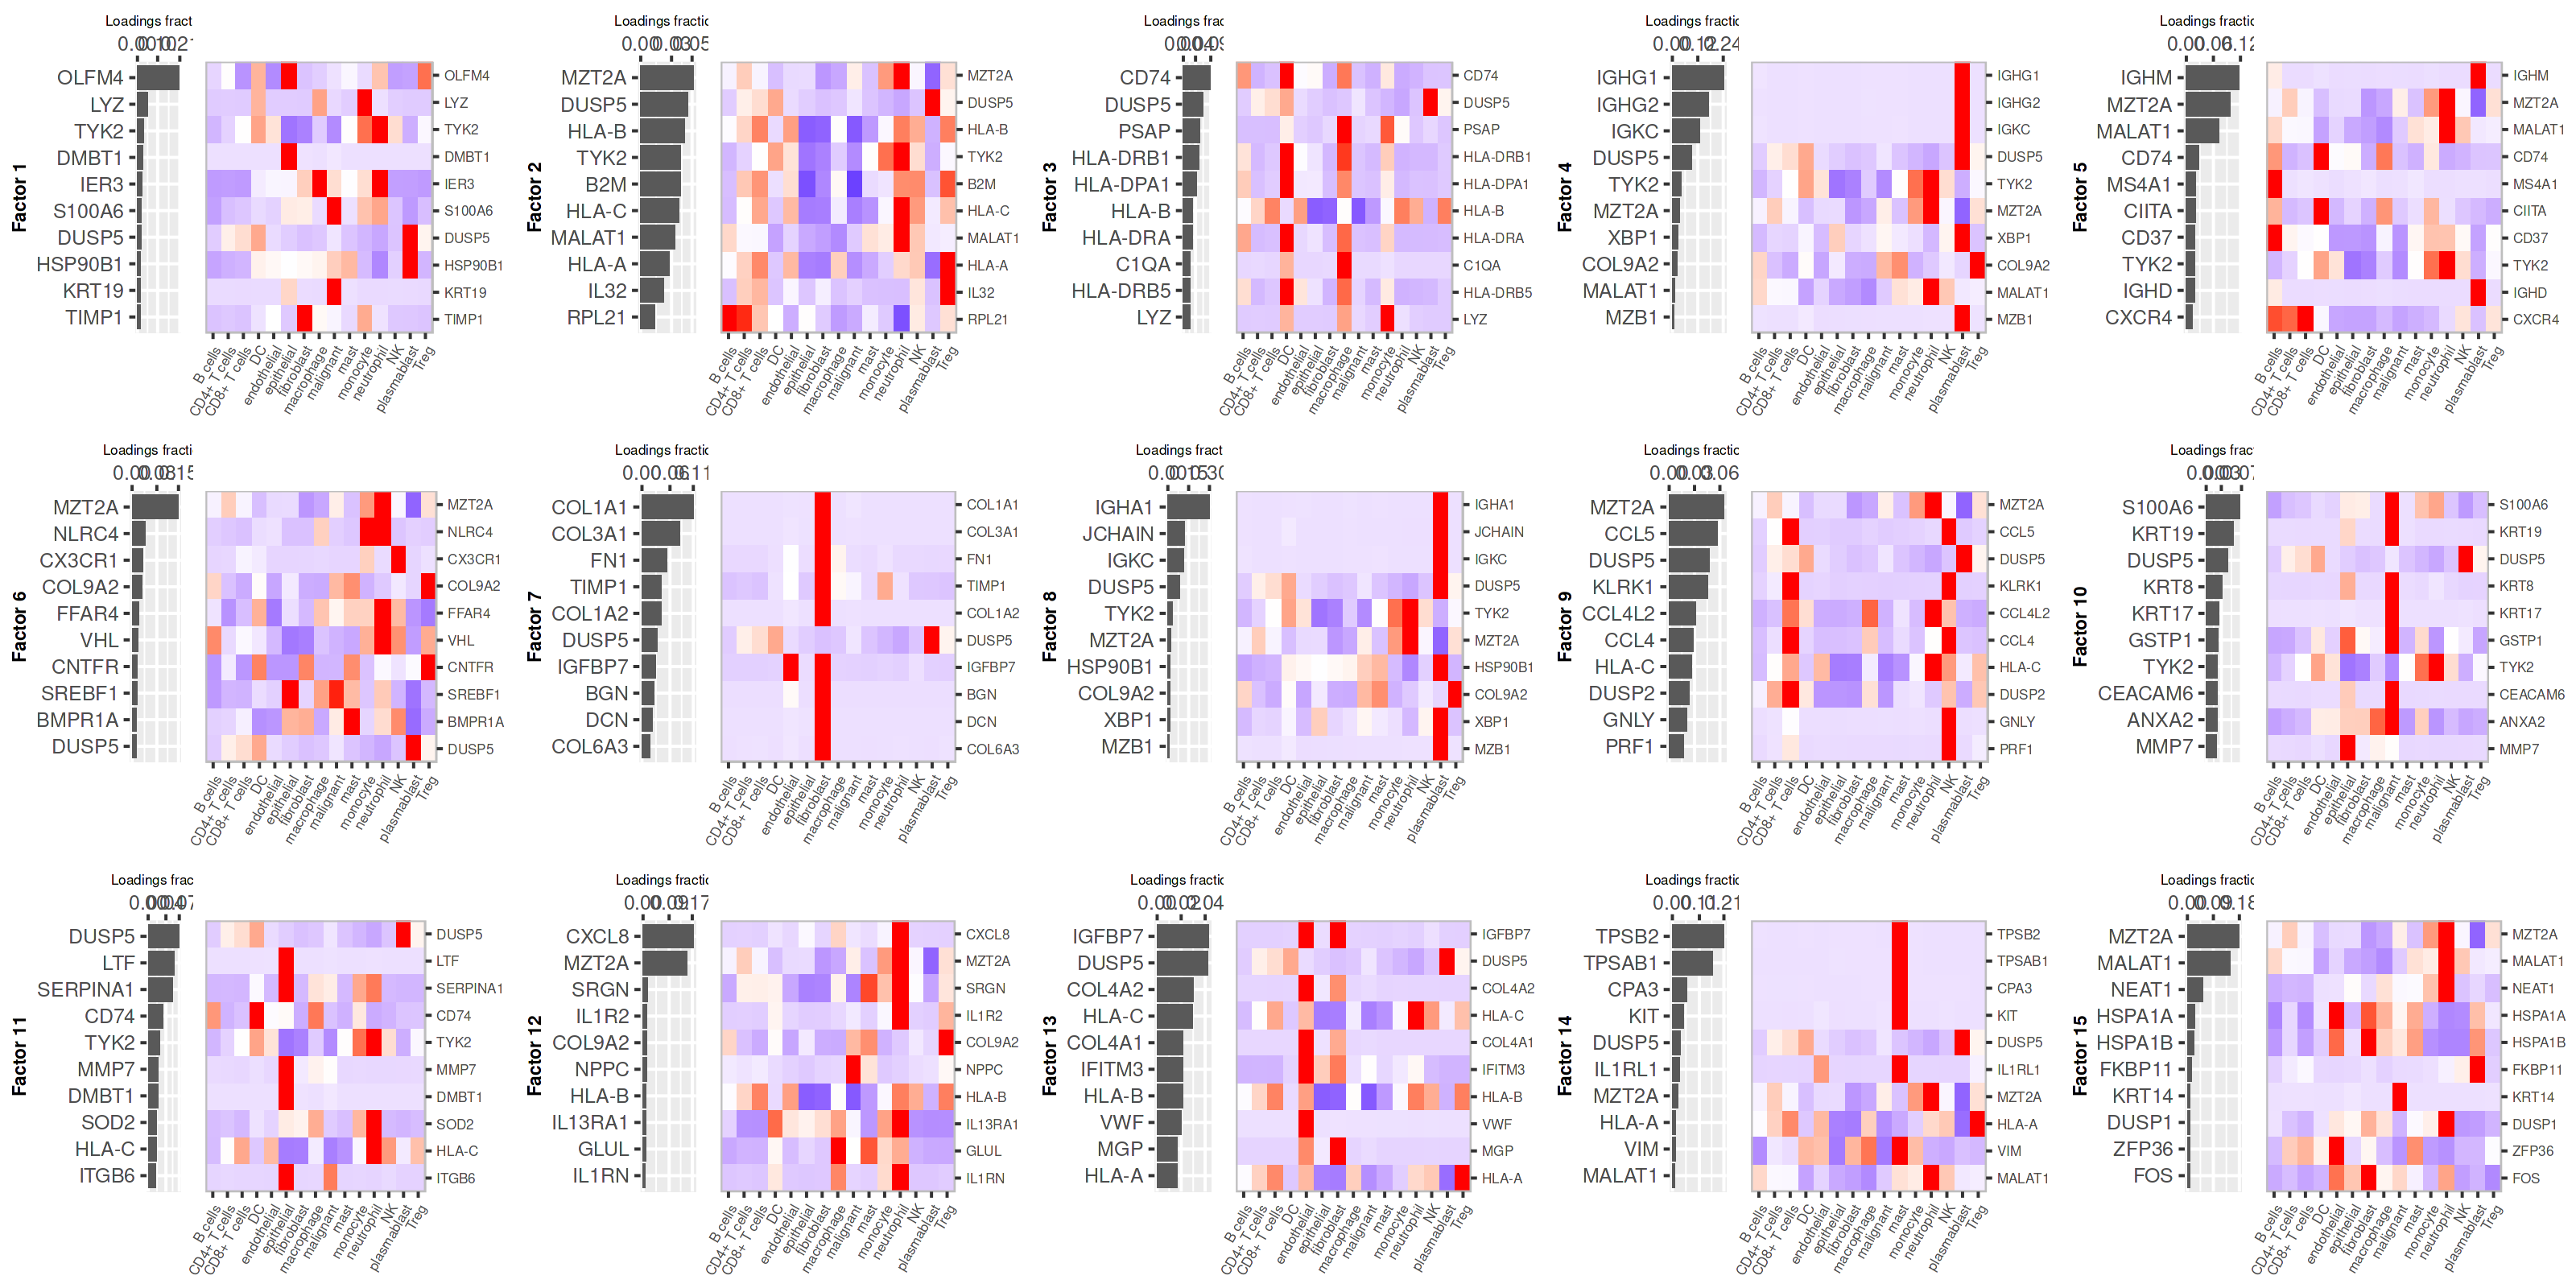

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 200)

# plot the top loadings and corresponding scRNAseq expression
p1 <- plot_nmf_loadings(res, ct.exp=ct_exp, nplt.row=3)
p1

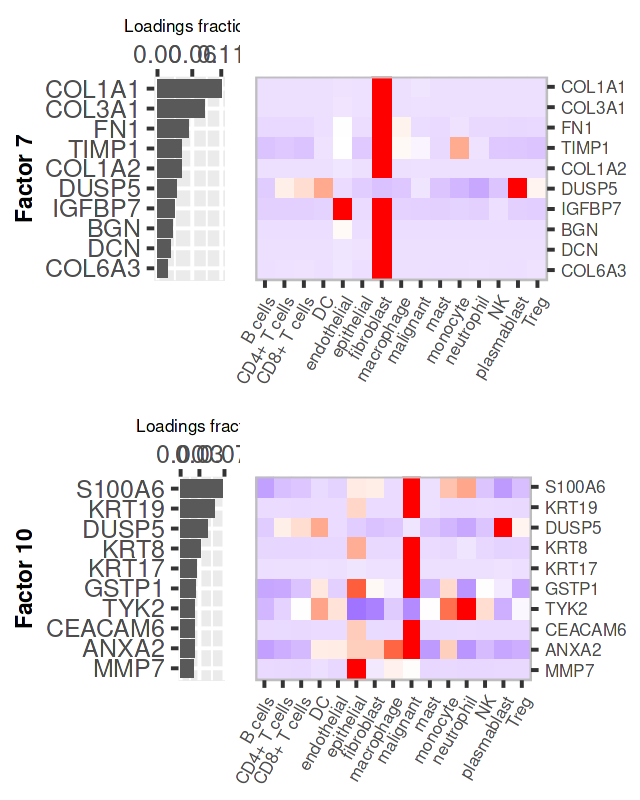

In [6]:
options(repr.plot.width = 3.2, repr.plot.height = 4, repr.plot.res = 200)

# plotting just the malignant factor
p2 <- plot_nmf_loadings(res, ct.exp=ct_exp, f.show=c(7,10), nplt.row=2)
p2

In [7]:
pdf(OutputPath("nsclc_nmf_fib_mal.pdf"), useDingbats=FALSE, width=3.2, height=4)
p2
dev.off()

png 
  2